In [2]:
#k-means
import numpy as np
import matplotlib.pyplot as plt

/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


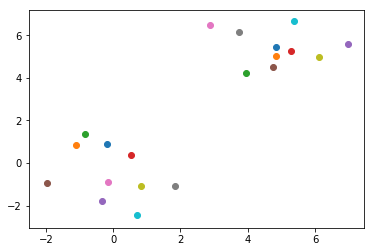

In [81]:
#generate dataset
dataset = np.vstack((np.random.randn(10,2)+[5,5],np.random.randn(10,2)))
dist_mat = np.sqrt(np.power(dataset,2).sum(1)+np.expand_dims(np.power(dataset,2).sum(1),1)-2*np.dot(dataset,dataset.T))
for p in dataset:
    plt.scatter(p[0],p[1])

In [76]:
k = 2
MAX_LOOP = 150

In [82]:
def K_Means_Cluster(dataset, k=2, MAX_LOOP=100):
    #rand choose k points as k centers
    k_center_indices = np.random.choice(dataset.shape[0],k,replace = False)
    #compute the distance matrix between points and centers
    center_mat = dataset[k_center_indices]
    dist_mat = ComputeDistMat(dataset,center_mat)
    #do cluster
    last_cluster_results = np.argmin(dist_mat,axis=1)
    #loop
    loop = 0
    while(loop < MAX_LOOP):
        #compute the mean of each cluster as center
        mean_list = []
        for c in range(k):
            mean_list.append(np.mean(dataset[np.where(last_cluster_results == c)], 0))
            #print(mean_list)
        #compute the distance matrix between points and centers
        center_mat = np.array(mean_list)
        dist_mat = ComputeDistMat(dataset,center_mat)
        #do cluster
        cluster_results = np.argmin(dist_mat,axis=1)
        if (cluster_results == last_cluster_results).all():
            loop = MAX_LOOP
            print('cluster center fixed')
        else:
            last_cluster_results = cluster_results
            loop += 1
            
    return cluster_results

In [84]:
cluster_results = K_Means_Cluster(dataset, k=2, MAX_LOOP=100)
print(cluster_results)

cluster center fixed
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
